In [1]:
# Import the necessary Python Libraries
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import flopy as fp

In [2]:
modelname = 'sokotoproject5'
modelws = './sokotoproject5'
path = os.getcwd() # path to current working directory
plt.rcParams['figure.figsize'] = (5, 5) #default figure size
plt.rcParams["figure.autolayout"] = True # Same as tight_layout ???

# Model Parameters

In [3]:
# Define surface and base elevations as Dictionaries

se = {"filename": "se.dat", "factor": 1.0,} 
be_1 = {"filename": "be_1.dat", "factor": 1.0,} 
be_2 = {"filename": "be_2.dat", "factor": 1.0,} 
be_3 = {"filename": "be_3.dat", "factor": 1.0,} 
be_4 = {"filename": "be_4.dat", "factor": 1.0,} 
ib_1 = {"filename": "ibound_1.dat", "factor": 1.0,}
ib_2 = {"filename": "ibound_2.dat", "factor": 1.0,}
ib_3 = {"filename": "ibound_3.dat", "factor": 1.0,}
ib_4 = {"filename": "ibound_4.dat", "factor": 1.0,}
in_wl1 = {"filename": "in_wl1.dat", "factor": 1.0,}
in_wl2 = {"filename": "in_wl2.dat", "factor": 1.0,}
in_wl3 = {"filename": "in_wl3.dat", "factor": 1.0,}
in_wl4 = {"filename": "in_wl4.dat", "factor": 1.0,}

# Define Grid Properties
Lx =  537323.38 #   meters
Ly =  453882.13 #   meters
ncol = 1000 #  Number of Columns
nrow = 800 #  Number of Rows
delc = Lx / ncol
delr = Ly / nrow

# Set No. of Layers, Surface and base elevations
nlay = 4 # Number of layers
top = se # top of top layer, meter
botm = [be_1, be_2, be_3, be_4] # bottom of each layer, meter
ibound = [ib_1, ib_2, ib_3, ib_4] # bottom of each layer, meter
initial_wl = [in_wl1, in_wl2, in_wl3, in_wl4] # Initial water levels for each layer, m OD
print(delc)
print(delr)

537.32338
567.3526625


In [4]:
# Set Aquifer Properties - Hydraulic conductivities and Storage values

k_hor = [0.2781, 0.07515, 0.04247, 0.05022] #[0.0002781, 0.0007515, 0.0004247, 0.0005022]  # horizontal hydraulic conductivity, m/d
k_ver = [0.001668, 0.004510, 0.002548, 0.003013] #[0.000001668, 0.000004510, 0.000002548, 0.000003013] # # vertical hydraulic conductivity, m/d
sy = [0.15, 0.10, 0.12, 0.13] # Specific yiels, %
ss = [0.006, 0.00001, 0.0005, 0.006] # specific storage
# porosity = 0.3 # porosity for all the layers

## Create Simulation

In [5]:
# Simulation
sim = fp.mf6.MFSimulation(sim_name=modelname,
                         version='mf6',
                         exe_name='mf6',
                         sim_ws=modelws,
                         )
#sim = flopy.mf6.MFSimulation(sim_name=name, exe_name="mf6", version="mf6", sim_ws=workspace)

In [6]:
# Time Discretization Transient State
tdis_rc = [
            (31, 1, 1.0), (28, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0),
            (31, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0),
            (31, 1, 1.0), (28, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0),
            (31, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0),
            (31, 1, 1.0), (28, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0),
            (31, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0),
            (31, 1, 1.0), (29, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0),
            (31, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0),
            (31, 1, 1.0), (28, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0),
            (31, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0),
            (31, 1, 1.0), (28, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0),
            (31, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0),
            (31, 1, 1.0), (28, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0),
            (31, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0), (30, 1, 1.0), (31, 1, 1.0)
            ]
# Simulation period is: Jan 1, 2013 - Dec 31, 2019
# period length, number of steps, timestep multiplier

tdis = fp.mf6.ModflowTdis(sim,
                         time_units='Days',
                          nper=84,
                         perioddata=tdis_rc,
                         )

In [7]:
# Groundwater Flow Model (GWF)
# List of Parameters:
# simulation, modelname='model', model_nam_file=None, version='mf6', exe_name='mf6', model_rel_path='.', list=None, 
# print_input=None, print_flows=None, save_flows=None, newtonoptions=None, packages=None, **kwargs

gwf = fp.mf6.ModflowGwf(sim,
                       modelname=modelname,
                       model_nam_file=f"{modelname}.nam",
                       save_flows=True,
                       )

In [8]:
# Iterative model solution (Ims)

# List of Parameters:
# simulation, loading_package=False, print_option=None, complexity=None, csv_output_filerecord=None, 
# csv_outer_output_filerecord=None, csv_inner_output_filerecord=None, no_ptcrecord=None, ats_outer_maximum_fraction=None, 
# outer_hclose=None, outer_dvclose=None, outer_rclosebnd=None, outer_maximum=None, under_relaxation=None, 
# under_relaxation_gamma=None, under_relaxation_theta=None, under_relaxation_kappa=None, 
# under_relaxation_momentum=None, backtracking_number=None, backtracking_tolerance=None, backtracking_reduction_factor=None, 
# backtracking_residual_limit=None, inner_maximum=None, inner_hclose=None, inner_dvclose=None, rcloserecord=None, 
# linear_acceleration=None, relaxation_factor=None, preconditioner_levels=None, preconditioner_drop_tolerance=None, 
# number_orthogonalizations=None, scaling_method=None, reordering_method=None, filename=None, pname=None, **kwargs

ims = fp.mf6.ModflowIms(
                        sim,
                        pname="ims",
                        print_option="SUMMARY",
                        complexity="SIMPLE",
                        outer_dvclose=0.0001,
                        outer_maximum=500,
                        under_relaxation="NONE",
                        inner_maximum=100,
                        inner_dvclose=0.0001,
                        rcloserecord=0.001,
                        linear_acceleration="CG",
                        scaling_method="NONE",
                        reordering_method="NONE",
                        relaxation_factor=0.97,
                        )
sim.register_ims_package(ims, [gwf.name])

# Add Packages to groundwater flow model

In [21]:
# initial conditions
#initial_wl = {0: {'filename': 'initial_wl11.dat'}}

#strt = {"filename": "in_wl.dat", "factor": 1.0,}

ic = fp.mf6.ModflowGwfic(
                        model=gwf,
                        pname="ic",
                        strt=initial_wl,
                        filename="{}.ic".format(modelname)
                        )

In [23]:
# create the constant head boundary package
chd_spd = {0: {"filename":"chd.dat"}}
chd = fp.mf6.ModflowGwfchd(
                            model=gwf,
                            print_input=True,
                            print_flows=True,
                            save_flows=True,
                            maxbound=7070,
                            stress_period_data=chd_spd,
                            #parent_file=gwf,
                            filename="{}.chd".format(modelname),
                            pname='CHD'    
                          )

In [24]:
# Discretization Package (Gwfdis)

# Parameters:
# model, loading_package=False, length_units=None, nogrb=None, xorigin=None, 
# yorigin=None, angrot=None, nlay=1, nrow=2, ncol=2, delr=1.0, delc=1.0, top=1.0, 
# botm=0.0, idomain=None, filename=None, pname=None, **kwargs
#dis.botm.set_record([be_1, be_2, be_3, be_4])
dis = fp.mf6.ModflowGwfdis(
                          model=gwf,
                          length_units='METERS',
                          nlay=nlay,
                          nrow=nrow,
                          ncol=ncol,
                          delr=delr,
                          delc=delc,
                          top= top,
                          botm=botm,
                          idomain=ibound,
                          filename="{}.dis".format(modelname),
                          )

In [25]:
# River Package

river_loc = {0: {"filename":"mfrivers.dat"}}

riv = fp.mf6.ModflowGwfriv(
                           model=gwf,
                           pname="riv",
                           print_input=True,
                           print_flows=True,
                           save_flows="{}.cbc".format(modelname),
                           #boundnames=True,
                           maxbound=22280,
                           stress_period_data=river_loc,
                           )

In [26]:
# Definition of Well Package
bh_loc = {0: {"filename": "1bhloc.dat"},
          7: {"filename": "2bhloc.dat"},
          9: {"filename": "3bhloc.dat"},
          12: {"filename": "1bhloc.dat"},
          18: {"filename": "2bhloc.dat"},
          21: {"filename": "3bhloc.dat"},
          24: {"filename": "1bhloc.dat"},
          30: {"filename": "2bhloc.dat"},
          33: {"filename": "3bhloc.dat"},
          36: {"filename": "1bhloc.dat"},
          42: {"filename": "2bhloc.dat"},
          45: {"filename": "3bhloc.dat"},
          48: {"filename": "1bhloc.dat"},
          54: {"filename": "2bhloc.dat"},
          57: {"filename": "3bhloc.dat"},
          60: {"filename": "1bhloc.dat"},
          66: {"filename": "2bhloc.dat"},
          69: {"filename": "3bhloc.dat"},
          72: {"filename": "1bhloc.dat"},
          78: {"filename": "2bhloc.dat"},
          81: {"filename": "3bhloc.dat"}
         }

wel = fp.mf6.ModflowGwfwel(
                            model=gwf,
                            pname="wel",
                            print_input=True,
                            print_flows=True,
                            #auxiliary=[("var1", "var2", "var3")],
                            maxbound=1509,
                            stress_period_data=bh_loc,
                            #boundnames=True,
                            save_flows=True,
                            )


In [27]:
# Node Property Flow Package (Gwfnpf)
npf = fp.mf6.ModflowGwfnpf(gwf,
                          save_specific_discharge=True,
                          icelltype=[1, 1, 1, 1], # top layer is unconfined
                          k=k_hor, # horizontal k value
                          k33=k_ver, # vertical k value
                          )

In [28]:
# Storage Package

sto = fp.mf6.ModflowGwfsto(
                            model=gwf,
                            pname="sto",
                            save_flows=True,
                            iconvert=1,
                            ss=ss,
                            sy=sy,
                            steady_state={0: True},
                            transient={1: True},
                            )

In [29]:
# rch

#transient with time-varying recharge
rch_dry = 0.0
rch_wet = 0.000137
rch_semiwet = 0.0000274
rech = {}
rech[0] = rch_dry #stress period 1 to 6 (Jan - June) 0.0 mm/yr
rech[7] = rch_wet #stress period 7 to 9 (July - Sept) 50.0 mm/yr
rech[9] = rch_semiwet #stress period 9 to 12 (Oct - Dec) 10 mm/yr
rech[12] = rch_dry #stress period 1 to 6 (Jan - June) 0.0 mm/yr
rech[18] = rch_wet #stress period 7 to 9 (July - Sept) 50.0 mm/yr
rech[21] = rch_semiwet #stress period 9 to 12 (Oct - Dec) 10 mm/yr
rech[24] = rch_dry #stress period 1 to 6 (Jan - June) 0.0 mm/yr
rech[30] = rch_wet #stress period 7 to 9 (July - Sept) 50.0 mm/yr
rech[33] = rch_semiwet #stress period 9 to 12 (Oct - Dec) 10 mm/yr
rech[36] = rch_dry #stress period 1 to 6 (Jan - June) 0.0 mm/yr
rech[42] = rch_wet #stress period 7 to 9 (July - Sept) 50.0 mm/yr
rech[45] = rch_semiwet #stress period 9 to 12 (Oct - Dec) 10 mm/yr
rech[48] = rch_dry #stress period 1 to 6 (Jan - June) 0.0 mm/yr
rech[54] = rch_wet #stress period 7 to 9 (July - Sept) 50.0 mm/yr
rech[57] = rch_semiwet #stress period 9 to 12 (Oct - Dec) 10 mm/yr
rech[60] = rch_dry #stress period 1 to 6 (Jan - June) 0.0 mm/yr
rech[66] = rch_wet #stress period 7 to 9 (July - Sept) 50.0 mm/yr
rech[69] = rch_semiwet #stress period 9 to 12 (Oct - Dec) 10 mm/yr
rech[72] = rch_dry #stress period 1 to 6 (Jan - June) 0.0 mm/yr
rech[78] = rch_wet #stress period 7 to 9 (July - Sept) 50.0 mm/yr
rech[81] = rch_semiwet #stress period 9 to 12 (Oct - Dec) 10 mm/yr

#rch = flopy.modflow.ModflowRch(m, nrchop=3, rech=rech)
#recharge = {0: {'filename': 'recharge.dat'}} #, 'data': np.ones((nrow, ncol)) * 0.005}}

rch = fp.mf6.ModflowGwfrcha(
                            model=gwf, 
                            nrchop=3,
                            recharge=rech,
                            filename="{}.rch".format(modelname),
                            pname="rch",
                            #fixed_cell=True,
                            #auxiliary="MULTIPLIER",
                            #auxmultname="MULTIPLIER",
                            print_input=True,
                            print_flows=True,
                            save_flows=True,
                            maxbound=20,
                            stress_period_data=rech,
                            )

In [30]:
# Evapotranspiration
# Parametr Lists
# model, loading_package=False, fixed_cell=None, auxiliary=None, auxmultname=None, boundnames=None, 
# print_input=None, print_flows=None, save_flows=None, timeseries=None, observations=None, 
# surf_rate_specified=None, maxbound=None, nseg=None, stress_period_data=None, filename=None, pname=None, **kwargs

evtr = {0: {"filename": "mevt.dat"}}
evt = fp.mf6.ModflowGwfevt(
                            gwf,
                            pname="evt",
                            filename="{}.evt".format(modelname),
                            print_input=True,
                            print_flows=True,
                            save_flows=True,
                            maxbound=9900,
                            nseg=1,
                            stress_period_data=evtr, 
                            )

In [31]:
# Output Control (Gwfoc)

oc = fp.mf6.ModflowGwfoc(
                            model=gwf,
                            pname="oc",
                            filename="{}.oc".format(modelname),
                            budget_filerecord="{}.cbc".format(modelname),
                            head_filerecord="{}.hds".format(modelname),
                            headprintrecord=[("COLUMNS", 10, "WIDTH", 15, "DIGITS", 6, "GENERAL")],
                            saverecord=[("HEAD", "ALL"), ("BUDGET", "ALL")],
                            printrecord=[("HEAD", "FIRST"), ("HEAD", "LAST"), ("BUDGET", "LAST")],
                            )

# Check input

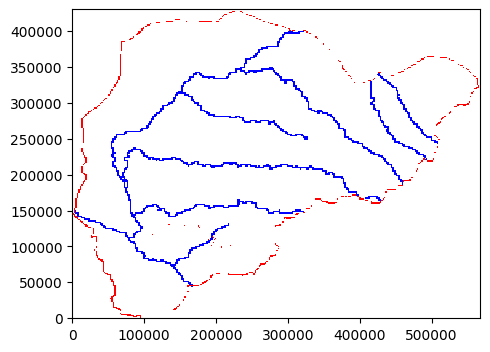

In [32]:
pmv = fp.plot.PlotMapView(model=gwf)
pmv.plot_bc('CHD', color='r')
pmv.plot_bc('RIV', color='b')
pmv.plot_bc('WEL', plotAll=True, color='r', lw=1)
#pmv.plot_grid(color='silver', lw=1);

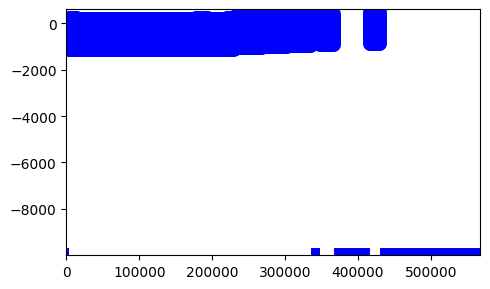

In [33]:
plt.figure(figsize=(5, 3))
pxs = fp.plot.PlotCrossSection(model=gwf, line={"Row": 500})
pxs.plot_bc('CHD')
pxs.plot_bc('RIV')
pxs.plot_bc('WEL')
pxs.plot_grid(colors='blue', lw=10);

## Create the MODFLOW 6 Input Files and Run the Model

#### Once all the flopy objects are created, it is very easy to create all of the input files and run the model.

# Solve model

In [34]:
sim.write_simulation();

writing simulation...
  writing simulation name file...
  writing simulation tdis package...
  writing ims package ims...
  writing model sokotoproject5...
    writing model name file...
    writing package ic...
    writing package chd...
    writing package dis...
    writing package riv...
    writing package wel...
    writing package npf...
    writing package sto...
    writing package rch...
    writing package evt...
    writing package oc...


In [35]:
# Print a list of the files that were created in workspace
print(os.listdir(modelws))

['1bhloc.dat', '2bhloc.dat', '3bhloc.dat', 'be_1.dat', 'be_2.dat', 'be_3.dat', 'be_4.dat', 'b_dry1.dat', 'chd.dat', 'f_sim_wl.dat', 'ibound_1.dat', 'ibound_2.dat', 'ibound_3.dat', 'ibound_4.dat', 'ib_1.dat', 'ib_2.dat', 'ib_3.dat', 'ib_4.dat', 'in_wl1.dat', 'in_wl2.dat', 'in_wl3.dat', 'in_wl4.dat', 'lc_1.dat', 'mevt.dat', 'mfrivers.dat', 'mfsim.lst', 'mfsim.nam', 'Old', 'se.dat', 'sim_wl.dat', 'sokotoproject5.cbc', 'sokotoproject5.chd', 'sokotoproject5.dis', 'sokotoproject5.dis.grb', 'sokotoproject5.evt', 'sokotoproject5.hds', 'sokotoproject5.ic', 'sokotoproject5.ims', 'sokotoproject5.lst', 'sokotoproject5.nam', 'sokotoproject5.npf', 'sokotoproject5.oc', 'sokotoproject5.rch', 'sokotoproject5.riv', 'sokotoproject5.sto', 'sokotoproject5.tdis', 'sokotoproject5.wel', 'xaa.dat', 'xab', 'xac', 'xad.dat', 'xae', 'xaf', 'xag.dat', 'xah', 'xai', 'xaj.dat', 'xak', 'xal', 'xam', 'xan.dat', 'xao', 'xap', 'xaq.dat', 'xar', 'xas', 'xat.dat', 'xau', 'xav', 'xaw.dat', 'xax', 'xay', 'xaz', 'xba', 'xbb.

## Run the Simulation

#### We can also run the simulation from the notebook, but only if the MODFLOW 6 executable is available. 
#### The executable can be made available by putting the executable in a folder that is listed in the system path variable.
#### Another option is to just put a copy of the executable in the simulation folder, though this should generally be avoided. 
#### A final option is to provide a full path to the executable when the simulation is constructed. 
#### This would be done by specifying exe_name with the full path.

In [36]:
# Run the simulation
#success, buff = sim.run_simulation(silent=True, report=True)
#if success:
#    for line in buff:
#        print(line)
#else:
#    raise ValueError("Failed to run.")

sim.run_simulation();

FloPy is using the following executable to run the model: C:\Users\olayi\AppData\Local\flopy\bin\mf6.EXE
                                   MODFLOW 6
                U.S. GEOLOGICAL SURVEY MODULAR HYDROLOGIC MODEL
                        VERSION 6.4.1 Release 12/09/2022

   MODFLOW 6 compiled Dec 10 2022 05:57:01 with Intel(R) Fortran Intel(R) 64
   Compiler Classic for applications running on Intel(R) 64, Version 2021.7.0
                             Build 20220726_000000

This software has been approved for release by the U.S. Geological 
Survey (USGS). Although the software has been subjected to rigorous 
review, the USGS reserves the right to update the software as needed 
pursuant to further analysis and review. No warranty, expressed or 
implied, is made by the USGS or the U.S. Government as to the 
functionality of the software and related material nor shall the 
fact of release constitute any such warranty. Furthermore, the 
software is released on condition that neither the US

## Post-Process Head Results

First, we get the simulated head data using the .output.head() method and the get_data function, by specifying, in this case, the step number and period number for which we want to retrieve data. A three-dimensional array is returned of size nlay, nrow, ncol. FloPy plotting methods are used to make contours of the head in a specific layer (in this case, layer 1). FloPy plotting methods are also used to plot the model grid and the location of GHB cells in the model domain.

In [39]:
# Retrieve the head data using the .output() method
h = gwf.output.head().get_data(kstpkper=(0, 5))

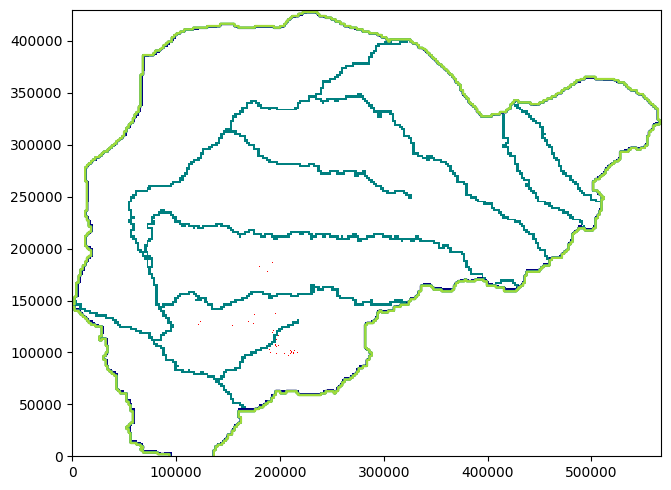

In [41]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(1, 1, 1, aspect="equal")

# Next we create an instance of the ModelMap class
modelmap = fp.plot.PlotMapView(model=gwf, ax=ax)

chd_quadmesh = modelmap.plot_bc(name="chd", plotAll=True)
wel_quadmesh = modelmap.plot_bc(name="wel", plotAll=True)
riv_quadmesh = modelmap.plot_bc(name="riv", plotAll=True)
#linecollection = modelmap.plot_grid()
contours = modelmap.contour_array(h[3])

## Post-Process Flows

MODFLOW 6 writes a binary grid file, which contains information about the model grid. MODFLOW 6 also writes a binary budget file, which contains flow information. Both of these files can be read using FloPy methods. The MfGrdFile class in FloPy can be used to read the binary grid file, which contains the cell connectivity (ia and ja). The output.budget() method in FloPy can be used to read the binary budget file written by MODFLOW 6.

In [42]:
fname = os.path.join(modelws, "{}.dis.grb".format(modelname))
bgf = fp.mf6.utils.MfGrdFile(fname)
ia, ja = bgf.ia, bgf.ja

In [27]:
flowja = gwf.output.budget().get_data(text="FLOW-JA-FACE")[0].squeeze()

In [28]:
# By having the ia and ja arrays and the flow-ja-face we can look at
# the flows for any cell and process them in the follow manner. Note
# layer, row, column locations are zero-based.
k = 2
i = 11
j = 2
cell_nodes = gwf.modelgrid.get_node([(k, i, j)])

for celln in cell_nodes:
    print("Printing flows for cell {}".format(celln))
    for ipos in range(ia[celln] + 1, ia[celln + 1]):
        cellm = ja[ipos]
        print(
            "Cell {} flow with cell {} is {}".format(
                celln, cellm, flowja[ipos]
            )
        )

Printing flows for cell 1611002


## Post-Process Head Observations

MODFLOW 6 observations can be read using the output.obs() method in FloPy.

# Read and Visualise Results

In [38]:
fname = os.path.join(modelws, f'{modelname}.hds') # File with extension hds
hdobj = fp.utils.HeadFile(fname)
head = hdobj.get_data(mflay=3) # get data of layer with index 2
print('minimum head in model: ', head.min())
print('maximum head in model: ', head.max())

minimum head in model:  26.134018591264876
maximum head in model:  1e+30


# Contour Plot

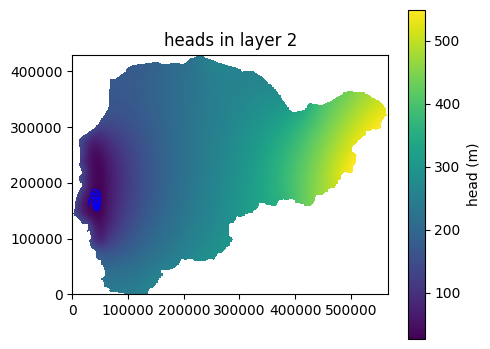

In [44]:
pmv = fp.plot.PlotMapView(model=gwf)
qm = pmv.plot_array(head) # Color plots of head
plt.colorbar(qm, shrink=0.7, label='head (m)')
cs = pmv.contour_array(head, levels=range(-250, 30), linewidths=1, colors='b') # Colors of head plots
plt.clabel(cs, fmt='%1.0f')
plt.title('heads in layer 2');

# Water Balance

In [45]:
fname = os.path.join(modelws, f"{modelname}.cbc") # File with extension .cbc
cbb = fp.utils.CellBudgetFile(fname)

Qwell = cbb.get_data(text='WEL')[0] # default name or name package (pname)
Qrch = cbb.get_data(text='RCH')[0]
Qevt = cbb.get_data(text='EVT')[0]
#Qchd = cbb.get_data(text='CHD')[0]
Vin = Qrch['q'].sum() # total volume in
Vout = Qwell['q'].sum() + Qevt['q'].sum()
print(f'In: {Vin:.1f} m^3/d')
print(f'Out: {Vout:.1f} m^3/d')
print(f'Relative error {100*(Vin + Vout) / Vin:.2f} %')

In: 0.0 m^3/d
Out: -278042.1 m^3/d
Relative error -inf %


# Plot head vs time at wells

In [ ]:
fname = os.path.join(modelws, f'{modelname}.hds') #file with extension .hds
hdobj = fp.utils.HeadFile(fname)
clist = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, ax = plt.subplots()
for i, rc in enumerate(well_row_col):
    r = rc[0]
    c = rc[1]
    hts = hdobj.get_ts([[0, r, c]])
    plt.plot(hts[:, 0], hts[:, 1], '--', color=clist[i], label=f"Well {i}, layer 0")
    hts = hdobj.get_ts([[2, r, c]])
    plt.plot(hts[:, 0], hts[:, 1], '--', color=clist[i], label=f"Well {i}, layer 2")
ax.set_xlabel('Time (days)')
ax.set_ylabel('Head (m)')
ax.legend()
# ax.set_xscale('Log')
ax.grid(ls=':');

# Read flow and Quiver Plot

In [ ]:
spdis = cbb.get_data(text='DATA-SPDIS')[0] # Returns rec array
qx = spdis["qx"].reshape(nlay, nrow, ncol)
qy = spdis["qy"].reshape(nlay, nrow, ncol)

In [ ]:
for l in range(nlay):
    ax = plt.subplot(2, 2, l + 1)
    pmv = fp.plot.PlotMapView(model=gwf, layer=l, ax=ax)
    quiver = pmv.plot_vector(qx,
                            qy,
                            scale=1,
                            istep=4,
                            jstep=4,
                            color="k",
                            )
    plt.xlim(Lx / 2, Lx)
    plt.title(f"Layer {l}")
plt.tight_layout()

# Pathlines with Modpath

In [ ]:
def PointsOnCircle(r=10, N=12):
    rv = [2 * np.pi / N * n_i for n_i in range(0, N)]
    return np.vstack((r * np.cos(rv), r * np.sin(rv))). T
pr = PointsOnCircle()

# Particles
localx = []
localy = []
localz = []
partlocs = []
for rc in well_row_col:
    r = rc[0]
    c = rc[1]
    for pr_i in pr:
        lx = (delc / 2 + pr_i[0]) / delc
        ly = (delr / 2 + pr_i[1]) / delr
        lz = 0.5
        partlocs.append((2, r, c))
        localx.append(lx)
        localy.append(ly)
        localz.append(lz)

particledata = fp.modpath.ParticleData(partlocs,
                                      structured=True,
                                      localx=localx,
                                      localy=localy,
                                      localz=localz)
pg = fp.modpath.ParticleGroup(particledata=particledata)

mp = fp.modpath.Modpath7(modelname=f"{modelname}_abs_wells_bw",
                        model_ws=modelws,
                        flowmodel=gwf,
                        exe_name='mpath7',
                        )
mpbas = fp.modpath.Modpath7Bas(mp, porosity=0.3)
mpsim = fp.modpath.Modpath7Sim(mp,
                              particlegroups=pg,
                              weaksourceoption='pass_through',
                              stoptimeoption='specified',
                              stoptime=100 * 365.,
                              trackingdirection='backward',
                              )
mp.write_input()
mp.run_model();

# Read and Plot Pathlines

In [ ]:
pmv = fp.plot.PlotMapView(model=gwf)
pmv.contour_array(head, levels=range(50, 70), linewidths=1, colors='C0')
fname = os.path.join(modelws, f"{modelname}_abs_wells_bw.mppth")
p = fp.utils.PathlineFile(fname)
for i in range(p.get_maxid() + 1): 
    pi = p.get_data(partid=i)
    plt.plot(pi['x'], pi['y'], 'C1', lw=1)


In [ ]:
# alternative that shows different color for different layer
clist = ['C' + str(i) for i in range(nlay)]
pmv = fp.plot.PlotMapView(model=gwf)
pmv.contour_array(head, levels=range(50, 70), linewidths=1, colors='C0')
for i in range(p.get_maxid() + 1):
    pi = p.get_data(partid=i)
    for k in np.unique(pi['k']):
        idx = pi['k'] == k
        x = pi['x'][idx]
        y = pi['y'][idx]
        plt.plot(x, y, color=clist[k])

In [ ]:
# Next line does not work in Jupyter Lab,
# run in Jupyter Notebook instead
# %matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0, p.get_maxid(), 2):
    pi = p.get_data(partid=i)
    c = int(i / 12)
    ax.plot(pi['x'], pi['y'], pi['z'], f'C{c}', lw=1)
    ax.set_xlim(0, Lx);

In [6]:
import numpy as np

# Load the two input arrays from external files
array1 = np.loadtxt('se_1.dat', dtype=np.float32)
array2 = np.loadtxt('initial_wl_1.dat', dtype=np.float32)
array3 = np.loadtxt('w_req.dat', dtype=np.float32)

# Subtract the arrays
w_available = (array1 - array2) - array3

# Save the result to an external text data file
np.savetxt('w_available.dat', w_available, fmt='%1.3e')